# Model Training
1.1 Import data and required packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

# modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings 

In [2]:
# %pip install catboost

In [18]:
df = pd.read_csv('data\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Preparing x and y variables

In [4]:
x = df.drop(columns=['math score'],axis=1)
x.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
print('gender ', df['gender'].unique())
print('race ethinicity ', df['race/ethnicity'].unique())
print('parental level of education ', df['parental level of education'].unique())
print('lunch ', df['lunch'].unique())
print('test preparation course ', df['test preparation course'].unique())


gender  ['female' 'male']
race ethinicity  ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch  ['standard' 'free/reduced']
test preparation course  ['none' 'completed']


In [6]:
y = df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

# Create column transofrmer with 3 types of trsnformers

In [7]:
num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer 

numeric_transformer = StandardScaler()
oneH_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oneH_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['reading score', 'writing score'], dtype='object'))])

In [8]:
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [9]:
x = preprocessor.fit_transform(X=x)
x.shape

(1000, 19)

In [10]:
# separate dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=143)
x_train.shape,x_test.shape

((800, 19), (200, 19))

# creat an evaluate function to give all metrics after model training

In [11]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,mse,rmse,r2_square


# models

In [12]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso':Lasso(),
    'ridge':Ridge(),
    'k-neighbors regressor':KNeighborsRegressor(),
    'decision tree':DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoostRegressor':CatBoostRegressor(),
    'adaboost regressor':AdaBoostRegressor()
}
model_list = []
r2_list =[]

for mdl in range(len(list(models))):
    model =list(models.values())[mdl]
    model.fit(x_train,y_train)
    
    #make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    #evaluate train and test dataset
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[mdl])
    model_list.append(list(models.keys())[mdl])
    
    print('model peformance for training set')
    print('- root mean square error: {:.4f}'.format(model_train_rmse))
    print('- mean absolute error: {:.4f}'.format(model_train_mae))
    print('- r2 score: {:.4f}'.format(model_train_r2))
    
    print('------------------------------------')
    
    print('model peformance for test set')
    print('- root mean square error: {:.4f}'.format(model_test_rmse))
    print('- mean absolute error: {:.4f}'.format(model_test_mae))
    print('- r2 score: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2
                   )
    
    print('='*35)
    print('\n')
    
    

LinearRegression
model peformance for training set
- root mean square error: 5.2485
- mean absolute error: 4.1918
- r2 score: 0.8792
------------------------------------
model peformance for test set
- root mean square error: 5.6547
- mean absolute error: 4.5242
- r2 score: 0.8602


Lasso
model peformance for training set
- root mean square error: 6.5640
- mean absolute error: 5.1845
- r2 score: 0.8111
------------------------------------
model peformance for test set
- root mean square error: 6.6675
- mean absolute error: 5.2635
- r2 score: 0.8056


ridge
model peformance for training set
- root mean square error: 5.2471
- mean absolute error: 4.1867
- r2 score: 0.8793
------------------------------------
model peformance for test set
- root mean square error: 5.6455
- mean absolute error: 4.5188
- r2 score: 0.8606


k-neighbors regressor
model peformance for training set
- root mean square error: 5.8961
- mean absolute error: 4.7415
- r2 score: 0.8476
--------------------------------

# results

In [13]:
pd.DataFrame(list(zip(model_list,r2_list)), 
             columns=['model name','r2 score']).sort_values(by=['r2 score'], 
                                                            ascending=False)

,model name,r2 score
2,ridge,0.860626
0,LinearRegression,0.860176
7,CatBoostRegressor,0.829875
5,RandomForestRegressor,0.829748
8,adaboost regressor,0.820127
1,Lasso,0.805602
6,XGBRegressor,0.790617
3,k-neighbors regressor,0.767529
4,decision tree,0.682309


# Linear regresion
this got better score compared to others and its a simple model thus easy to implement as well

In [14]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print(' accuracy of the model is %.2f'%score )




 accuracy of the model is 86.02


# plot y pred and y test

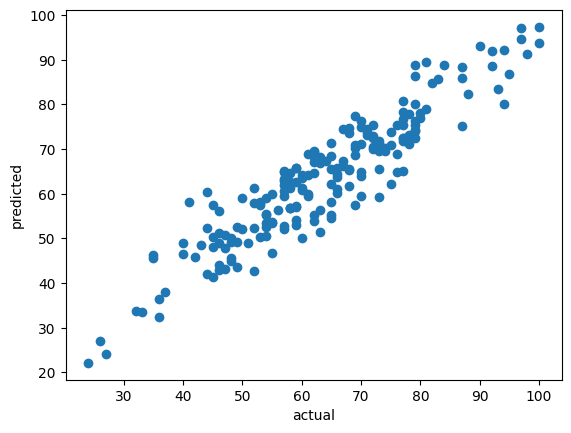

In [15]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

<AxesSubplot:xlabel='math score'>

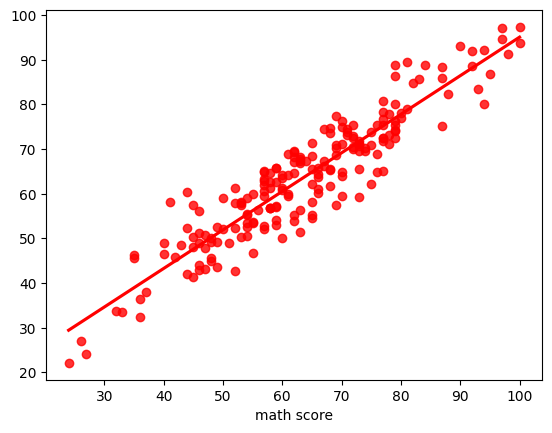

In [16]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')


# difference between actual and predicted values

In [17]:
pred_df = pd.DataFrame(
    {'actual value':y_test,
     'predicted value':y_pred,
     'difference':y_test-y_pred}
)
pred_df

,actual value,predicted value,difference
462,71,73.15625,-2.15625
421,57,52.15625,4.84375
642,72,70.06250,1.93750
301,56,56.37500,-0.37500
786,72,72.84375,-0.84375
...,...,...,...
338,24,22.09375,1.90625
152,59,57.09375,1.90625
564,48,50.03125,-2.03125
927,65,54.53125,10.46875


# end